# Practical based on LSTM

**DATASET**: Daily Climate time series data *(from Kaggle)*

It consists the data taken from 01-01-2013 to 24-04-2017 in the city of Delhi, India.

It has 4 parameters: **meantemp, humidity, wind_speed, meanpressure.**

**GOAL:** To predict the temperature based on previous trend.

**LSTM:**
It is a type of RNN architechture which was introduced in 1997 to overcome the limitation of traditional RNN in handling the long-term dependencies.


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [29]:
df_train = pd.read_csv('DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
df_train.dtypes

,0
meantemp,float64
humidity,float64
wind_speed,float64
meanpressure,float64


In [30]:
df_test = pd.read_csv('DailyDelhiClimateTest.csv', index_col='date', parse_dates=True)
df_test.dtypes

,0
meantemp,float64
humidity,float64
wind_speed,float64
meanpressure,float64


In [31]:
df_train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [32]:
df_train.drop(['humidity', 'wind_speed', 'meanpressure'], axis=1, inplace=True)
df_train

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


<Axes: xlabel='date'>

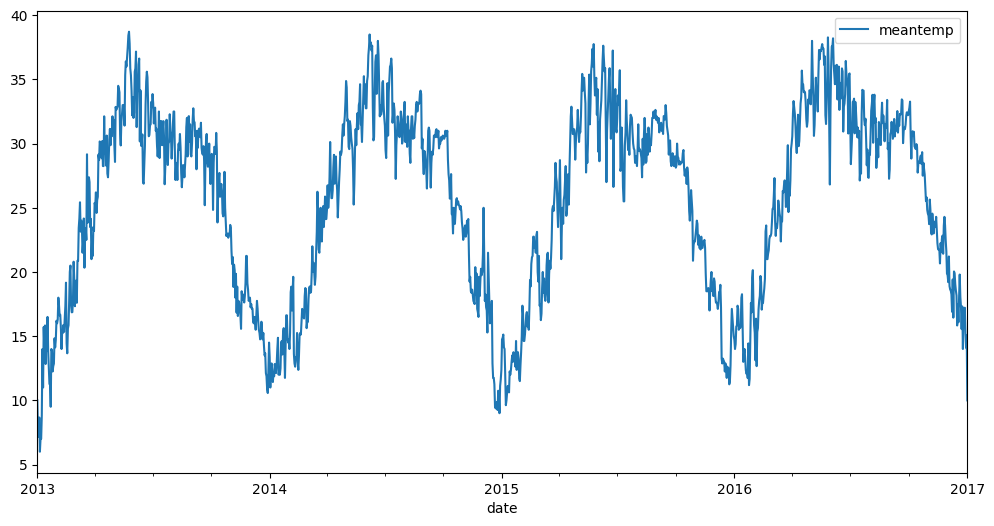

In [33]:
df_train.plot(figsize=(12,6))

In [34]:
df_test.drop(['humidity', 'wind_speed', 'meanpressure'], axis=1, inplace=True)
df_test

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

In [36]:
df_train_scaled

array([[0.12227074],
       [0.04279476],
       [0.0356623 ],
       ...,
       [0.24745269],
       [0.276718  ],
       [0.12227074]])

In [37]:
df_test_scaled

array([[0.3030188 ],
       [0.38209607],
       [0.33964095],
       [0.38820961],
       [0.37869966],
       [0.40710599],
       [0.2661936 ],
       [0.2960239 ],
       [0.26200873],
       [0.18680252],
       [0.15283843],
       [0.17697081],
       [0.2211662 ],
       [0.22008734],
       [0.31896715],
       [0.26441048],
       [0.17491509],
       [0.21524745],
       [0.26346434],
       [0.2831533 ],
       [0.28707044],
       [0.38026201],
       [0.37040843],
       [0.37744447],
       [0.45851528],
       [0.31113537],
       [0.3209607 ],
       [0.27094085],
       [0.29548763],
       [0.31926249],
       [0.30949782],
       [0.28275109],
       [0.33902342],
       [0.29456133],
       [0.38820961],
       [0.38611813],
       [0.33284813],
       [0.27893013],
       [0.29650655],
       [0.28657205],
       [0.26491994],
       [0.29421397],
       [0.31331878],
       [0.31586608],
       [0.33242358],
       [0.35371179],
       [0.43558952],
       [0.467

In [125]:
n_steps = 65

# split into samples
X, y = prepare_data(df_train_scaled, n_steps)

In [126]:
print(X)

[[[0.12227074]
  [0.04279476]
  [0.0356623 ]
  ...
  [0.35458515]
  [0.45469432]
  [0.45414847]]

 [[0.04279476]
  [0.0356623 ]
  [0.08151383]
  ...
  [0.45469432]
  [0.45414847]
  [0.53275109]]

 [[0.0356623 ]
  [0.08151383]
  [0.        ]
  ...
  [0.45414847]
  [0.53275109]
  [0.55531295]]

 ...

 [[0.6595566 ]
  [0.62833576]
  [0.59663594]
  ...
  [0.33165939]
  [0.34288969]
  [0.28238719]]

 [[0.62833576]
  [0.59663594]
  [0.60569303]
  ...
  [0.34288969]
  [0.28238719]
  [0.24745269]]

 [[0.59663594]
  [0.60569303]
  [0.57546991]
  ...
  [0.28238719]
  [0.24745269]
  [0.276718  ]]]


In [127]:
print(y)

[[0.53275109]
 [0.55531295]
 [0.59388646]
 ...
 [0.24745269]
 [0.276718  ]
 [0.12227074]]


In [128]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [129]:
X.shape

(1397, 65, 1)

In [130]:
y.shape

(1397, 1)

In [131]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.1509
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0067
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0060
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0056
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0047
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045
Epoch 13/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0044
Epoch 14/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052
Epoch 15/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0045
E

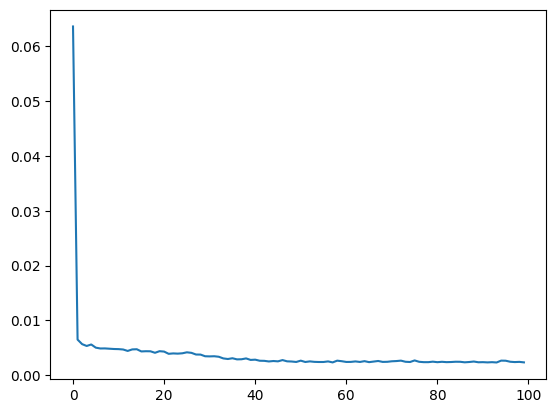

In [132]:
import matplotlib.pyplot as plt

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch, label='Train Loss')

In [133]:
last_train_batch = df_train_scaled[-n_steps:]
last_train_batch = last_train_batch.reshape((1, n_steps, n_features))

model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


array([[0.16315985]], dtype=float32)

In [134]:
df_test_scaled[0]

array([0.3030188])

In [135]:
test_predictions = []

first_eval_batch = df_train_scaled[-n_steps:]
current_batch = first_eval_batch.reshape((1, n_steps, n_features))

for i in range(len(df_test_scaled)):
    # get the prediction value and add it to the list
    current_pred = model.predict(current_batch, verbose = 1)[0]
    test_predictions.append(current_pred)

    # update the batch to include the new predicted value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [136]:
true_predictions = scaler.inverse_transform(test_predictions)
df_test['Predictions'] = true_predictions
df_test

,meantemp,Predictions
date,,
2017-01-01,15.913043,11.337658
2017-01-02,18.500000,11.721546
2017-01-03,17.111111,12.074546
2017-01-04,18.700000,12.413938
2017-01-05,18.388889,12.738177
...,...,...
2017-04-20,34.500000,32.129675
2017-04-21,34.250000,32.332653
2017-04-22,32.900000,32.530059


<Axes: title={'center': 'Predictions vs Actuals'}, xlabel='date'>

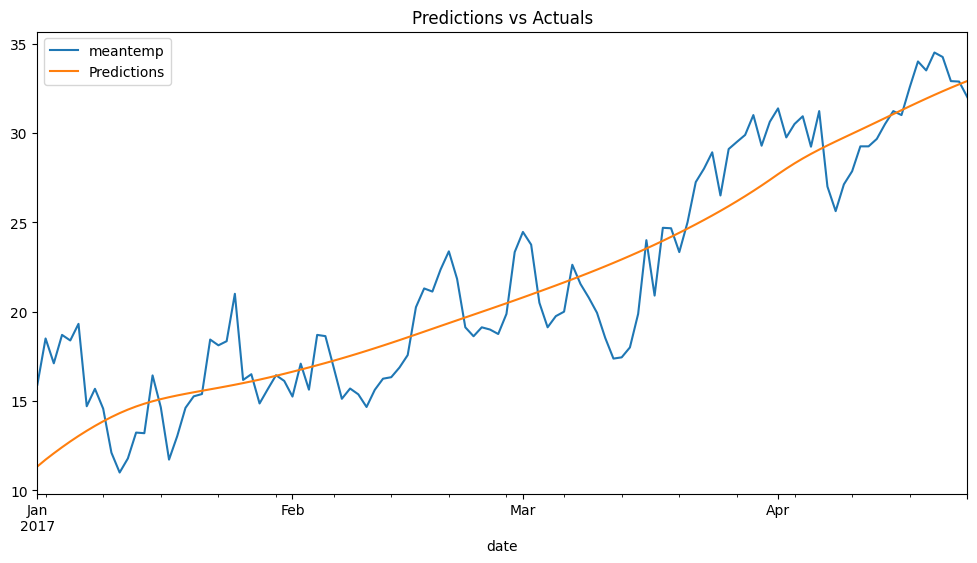

In [137]:
df_test.plot(figsize=(12,6), title='Predictions vs Actuals')

In [138]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df_test['meantemp'], df_test['Predictions']))
print(f"RMSE: {rmse:.2f}")

RMSE: 2.57


This model is at least able to predict the trend of the pattern which are in this time series dataset for temperature.